## Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
   
### 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

### 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

### 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

#### Create data dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0:Typical angina: chest pain related decrease blood supply to the heart
    * 1:Atypical angina: chest pain not related to heart
    * 2:Non-anginal pain: typically esophageal spasms (non heart related)
    * 3:Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0:Nothing to note
    * 1:ST-T Wave abnormality
      * can range from mild symptoms to severe problems
      * signals non-normal heart beat
    * 2:Possible or definite left ventricular hypertrophy
      * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0:Upsloping: better heart rate with excercise (uncommon)
    * 1:Flatsloping: minimal change (typical healthy heart)
    * 2:Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools
At the start of any project, it's custom to see the required libraries imported in a big chunk (as you can see in the code cell below).

However, in practice, when starting on new projects you may import libraries as you go (because you don't know what you need ahead of time).

After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up.

This is where you may want to consolidate every library you've used at the top of your notebook.

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.

In [114]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve 

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\haris\Desktop\MachineLearning\heart-disease-project\env\Lib\site-packages\sklearn\metrics\__init__.py)

## Loading Data 
There are many different ways to store data.

One typical way of storing tabular data, data similar to what you'd see in an Excel file is in .csv format or CSV format.

CSV stands for comma-separated values.

Other common formats include JSON, SQL and parquet.

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

>Note: CSV format is good for smaller datasets but can face some speed issues when working with larger datasets. For more on different data formats pandas is compatible with, I'd check out the pandas guide on reading and writing data.

>And there are many more read functions for different data formats in the Input/Output section of the pandas documentation.

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(row,col)

(303, 14)

## Data Exploration (exploratory data analysis or EDA) 

Once you've imported a dataset, the next step is to explore.

Or in formal terms, perform an Exploratory Data Analysis (EDA).

There's no set way of doing this.

But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable.

Refer back to your data dictionary and remind yourself of what different columns mean.

One of my favourites is viewing 10-100 random samples of the data.

Our goal here is to become a subject matter expert on the dataset you're working with.

So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (overfitting and memorizing the data rather than learning generalizable patterns) or why they might be performing poorly (underfitting or not learning patterns in the data).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the head() function.

Calling it on any dataframe will print the top 5 rows, tail() calls the bottom 5. You can also pass a number to them like head(10) to show the top 10 rows.


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [23]:
# Let's see how many positive (1) and negative (0) samples we have in our DataFrame
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Since these two values are close to even, our target column can be considered balanced.

An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set.

In an ideal world, all of your target classes have the same number of samples.

If you'd prefer these values in percentages, value_counts() takes a parameter, normalize which can be set to true.

In [24]:
# Normalized value counts
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.

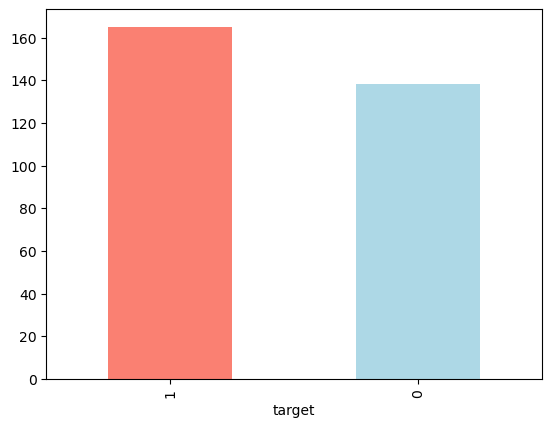

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

pd.DataFrame.info() - shows a quick insight into the number of missing values you have and what type of data you're working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Missing values
df.isna().sum()

Another way to get quick insights on your DataFrame is to use pd.DataFrame.describe().

describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing one feature to another


If you want to compare two columns to each other, you can use the function pd.crosstab(index, columns).

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.



 ### Heart Disease Frequency according to sex

Let's compare our target column with the sex column.

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease.

And for sex, 1 = male, 0 = female.

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64


There are 207 males and 96 females in our study.

What if we compared the target column values with the sex column values?

In [10]:
# Compare target column with sex colum
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


What can we infer from this? Let's make a simple heuristic.

Since there are about 100 women and 72 of them have a positive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a ~72% (72/96 women in our dataset are positive for heart disease) chance she has heart disease.

As for males, there's about 200 total with around half (93/207) indicating a presence of heart disease.

So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple **baseline**, we'll try to beat it with machine learning.

> Note: A baseline is a simple model or estimate you start with and try to beat/confirm throughout your experiments. It can be as simple as looking at the data as we've done and creating a predictive heuristic to move forward

### Making visual comparison 

We can plot our pd.crosstab comparison by calling the plot() method and passing it a few parameters:

* kind- The type of plot you want (e.g. "bar" for a bar plot).
* figsize=(length, width) - How big you want it to be.
* color=[colour_1, colour_2] - The different colours you'd like to use.
* Different metrics are represented best with different kinds of plots.

In our case, a bar graph is great. 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

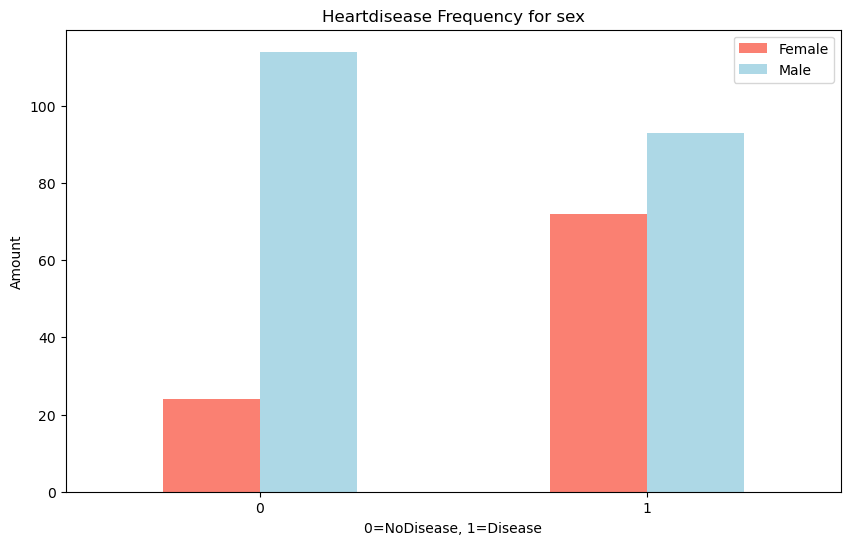

In [32]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heartdisease Frequency for sex")
plt.xlabel("0=NoDisease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0)

## Comparing age and maximum heart rate

Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.

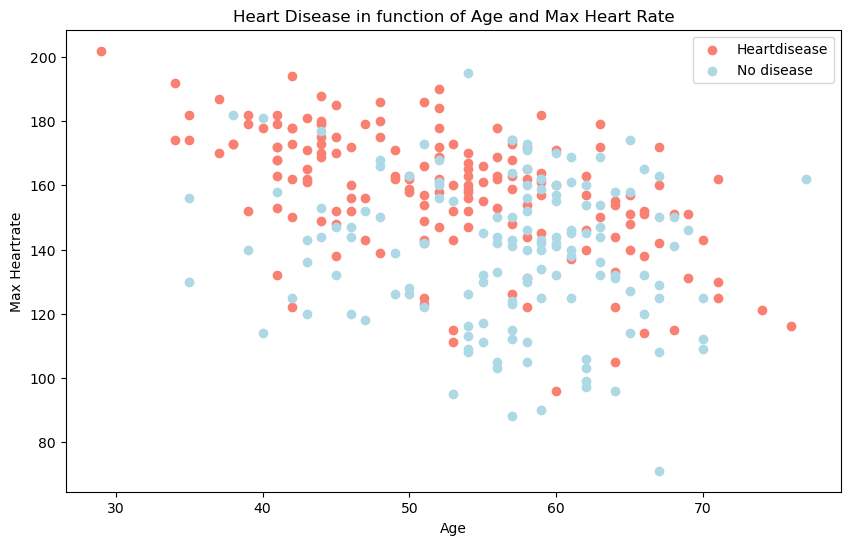

In [12]:
# Create another figure
plt.figure(figsize=(10,6))
# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon")
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heartrate")
plt.legend(["Heartdisease","No disease"])

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and it seems there may be more heart disease in the younger population too (more orange dots).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age distribution.

> Note: Distribution can considered as the spread of data. As in, when viewed as a whole, what different values appear in the data?

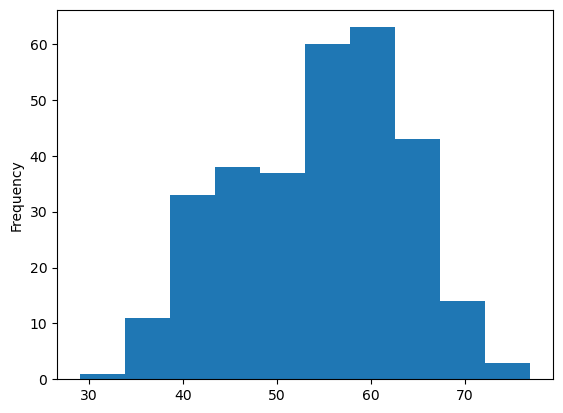

In [13]:
# Check the distribution or spread of the age column with a histogram
df.age.plot(kind='hist');

## Comparing heart disease frequency and chest pain type
cp - chest pain type

    * 0:Typical angina: chest pain related decrease blood supply to the heart
    * 1:Atypical angina: chest pain not related to heart
    * 2:Non-anginal pain: typically esophageal spasms (non heart related)
    * 3:Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

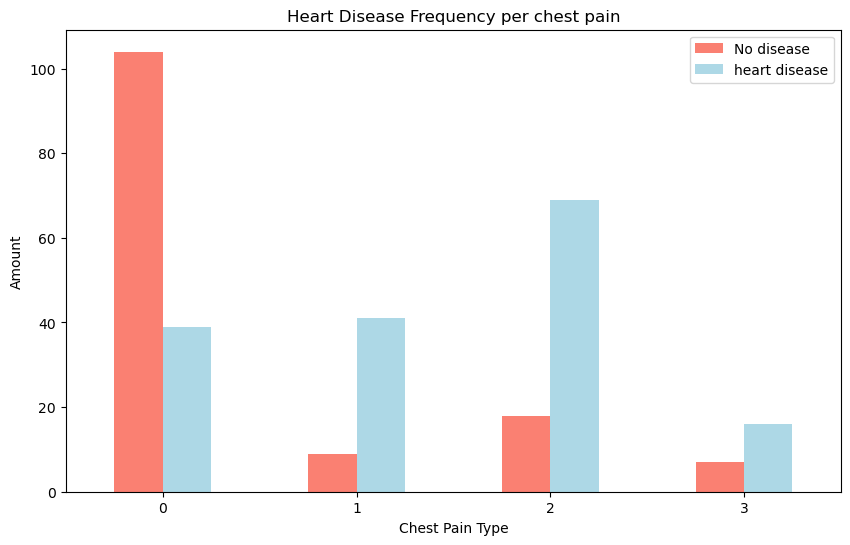

In [15]:
# Make crosstab visualization
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])

plt.title("Heart Disease Frequency per chest pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease","heart disease"])
plt.xticks(rotation=0)

It's interesting that atypical angina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does atypical agina even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values.

This research may come in the form of asking a subject matter expert (such as a cardiologist or the person who gave you the data) or Googling to find out more.

### Correlation between independent variables

we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using pd.DataFrame.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [16]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


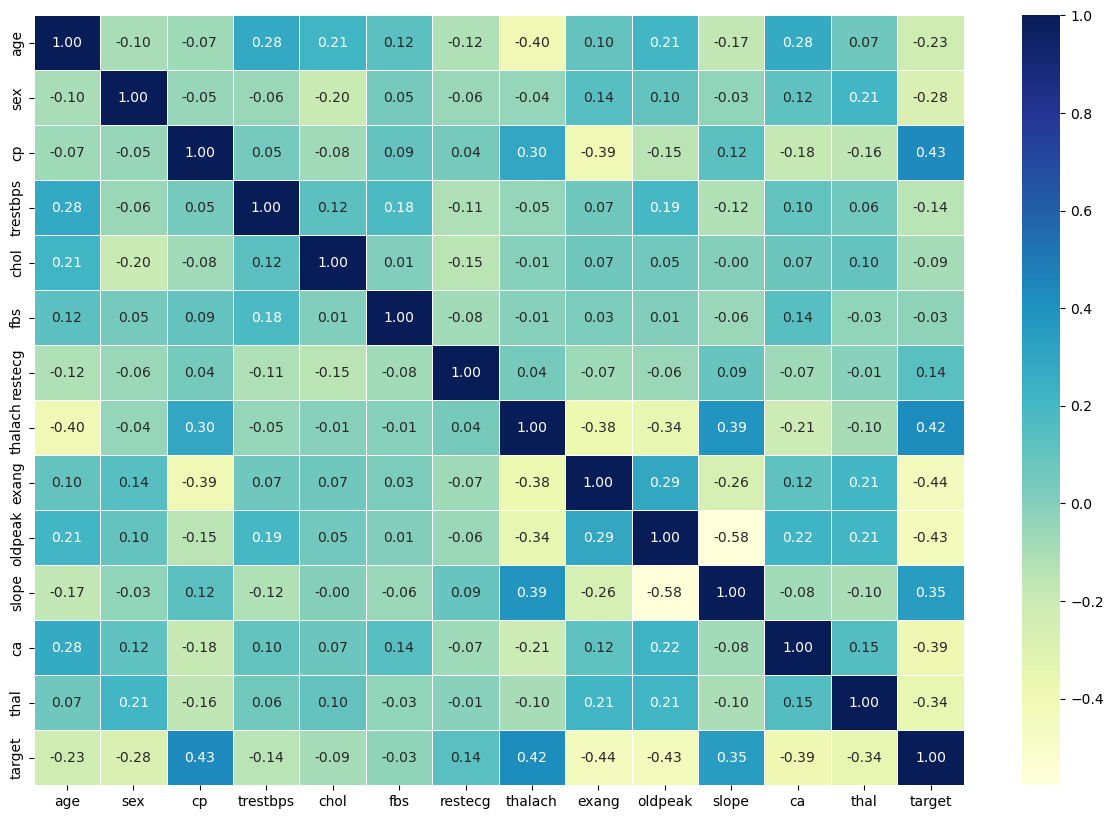

In [22]:
# Vizualizing correlation matrix with seaborn
corr_matrix = df.corr()
fig,axis = plt.subplots(figsize=(15,10))
axis = sns.heatmap(corr_matrix,
                    annot=True,
                    linewidths=0.5,
                    fmt='.2f',
                    cmap='YlGnBu');

* cp (chest pain type) -->	+0.434	Strong positive correlation — higher chest pain type (likely more serious) → more likely to have heart disease.
* thalach (max heart rate) --> +0.422	Higher max heart rate → more likely heart disease.
* slope -->	+0.346	Positive slope of ST segment → more likely heart disease.
* exang (exercise-induced angina) -->-0.437	If angina is induced by exercise, less likely to have heart disease.
* oldpeak (ST depression)--> -0.431	Higher depression during exercise → less likely to be healthy.
* ca (number of vessels colored)  --> -0.392	More vessels blocked → more likely to have heart disease.
* thal --> -0.344	Abnormal thalassemia types → more heart disease.
* sex  --> -0.281	Males more likely to have heart disease in this dataset (since 1 = male).

### Modelling

We've explored the data, now we'll try to build a machine learning model to be able to predict our target variable based on the 13 independent variables.

Remember our problem?

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

We can do this by creating:

* X - Our features (all variables except the target column) using pd.DataFrame.drop(labels="target").
* y - Our target variable using df.target.to_numpy() (this will extract the target column as a NumPy array).

In [38]:
# Everything except target variable
X = df.drop("target",axis=1)
# Target variable
y = df["target"]


### Creating a training and test split

Now comes one of the most important concepts in machine learning, creating a **training/test split**.

This is where we'll split our data into a **training set** and a **test set** .

We'll use our training set to train our model and our test set to evaluate it.

All the samples in the training set must be separate from those in the test set (and vice versa).

In short:

**Training set (often 70-80% of total data)** - Model learns patterns on this dataset to hopefully be able to predict on similar but unseen samples.
**Testing set (often 20-30% of total data)** - Trained model gets evaluated on these unseen samples to see how the patterns learned from the training set may perform on future unseen samples (e.g. when used in an application or production setting). However, performance on the test set is not guaranteed in the real world.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into the hospital and start using it on patients.

How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in.

It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's `sklearn.model_selection.train_test_split()` and feed it our independent and dependent variables (`X` & `y`).

In [42]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)
# Split into train & test set
X_train,X_test,y_train,y_test = train_test_split(X,  # independent variables 
                                                 y, # dependent variable
                                                 test_size=0.2)# percentage of data to use for test set

The test_size parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on.

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation 

But again, each problem will differ.

In [43]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [44]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [45]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### Choosing a model

Now we've got our data prepared, we can start to fit models.

In the modern world of machine learning, there are many potential models we can choose from.

Rather than trying every potential model, it's often good practice to try a handful and see how they go.

We'll start by trying the following models and comparing their results.

* Logistic Regression - `sklearn.linear_model.LogisticRegression()`
>Despite its name, it is implemented as a linear model for classification rather than regression in terms of the scikit-learn/ML nomenclature

* K-Nearest Neighbors - `sklearn.neighbors.KNeighboursClassifier()`
* RandomForest - `sklearn.ensemble.RandomForestClassifier()`

In [52]:
# Put models in a dictionary
models = {
    "Logistic Regression()":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}
# Create function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models:a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Random seed for reproducible results
    np.random.seed(42)
    #Make a dict to keep the model score
    model_scores={}
    # Loop through models
    for name , model in models.items():
         # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

### Comparing the results of several models

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

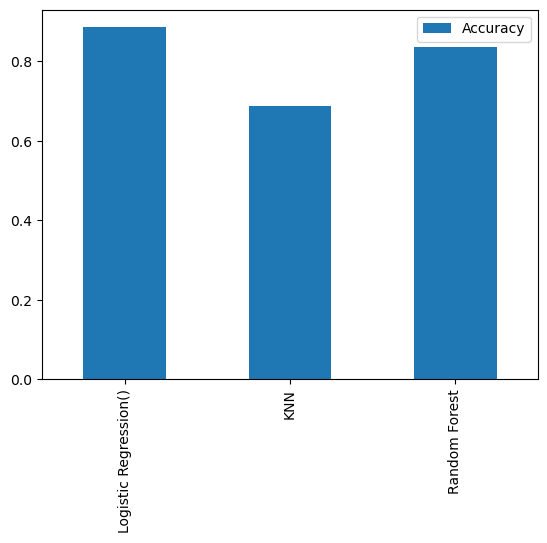

In [58]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();


From the plot it looks like the sklearn.linear_model.LogisticRegression() model performs best.

### Hyperparameter tuning and cross-validation

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

| Term                   | Definition                                                                                                                                                                                                                      |
|------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Hyperparameter tuning** | Many machine learning models have a series of settings/dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance. The practice of figuring out the best settings is called hyperparameter tuning. |
| **Feature importance**     | If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?                          |
| **Confusion matrix**       | Compares the predicted values with the true values in a tabular way. If 100% correct, all values in the matrix will be on the diagonal (top-left to bottom-right).                                                           |
| **Cross-validation**       | Splits your dataset into multiple versions of training and test sets and trains/evaluates your model on each version. This gives a more reliable estimate of performance than using a single train/test split.              |
| **Precision**              | A common classification evaluation metric. Measures the proportion of true positives over the total number of predicted positives. Higher precision leads to fewer false positives.                                         |
| **Recall**                 | A common classification evaluation metric. Measures the proportion of true positives over the total number of actual positives (true positives + false negatives). Higher recall leads to fewer false negatives.             |
| **F1 Score**               | Combines precision and recall into one metric using their harmonic mean. 1 is best, 0 is worst.                                                                                                                              |
| **Classification report** | Sklearn has a built-in function `classification_report()` which returns metrics like precision, recall, and F1-score.                                                                                                       |
| **ROC Curve**              | Receiver Operating Characteristic curve. A plot of true positive rate versus false positive rate. A perfect curve hugs the top-left corner of the plot.                                                                    |
| **Area Under Curve (AUC)**| The area underneath the ROC curve. A perfect model scores 1.0.                                                                                                                         |


To test different hyperparameters, you could use a validation set but since we don't have much data, we'll use cross-validation.

> Note: A validation set is a third player in the training/test split game. It's designed to be used in between a training and test set. You can think of it as the practice exam before the final exam. As in, the training set is the course material to learn on, the validation set is the practice exam to practice and tweak your skills on and the test set is the final exam to push your skills. In machine learning, the model learns patterns on the training set and then you can tweak hyperparameters to improve results on the validation set before finally testing your model on the testing set. All samples in the training, validation and test sets should be kept exclusive of each other.

The most common type of cross-validation is k-fold.

It involves splitting your data into k-fold's or k-different splits of the data and then training and testing a model on each split.

For example, let's say we had 5 folds (k = 5).

You have 5 different versions of train and test splits.

This means you'll be able to train and test 5 different versions of your model on different data splits and calculate the average performance.

Why do this?

This prevents us from focusing too much on the metrics from one data split (imagine the data split we do contains all the easy samples and the performance metrics we use say that the model performs better than it does).

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them.

We'll also get a few more metrics like precision, recall, F1-score and ROC at the same time.

Here's the plan:

1. Tune model hyperparameters, and see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There are several hyperparameters we can tune for the K-Nearest Neighbors (KNN) algorithm (or `sklearn.neighbors.KNeighborsClassifier`).

But for now, let's start with one, the number of neighbors.

The default is 5 (`n_neigbors`=5).

What are neighbours?

Well, imagine all our different samples on one graph like the scatter graph several cells above.

KNN works by assuming dots which are closer together belong to the same class.

If `n_neighbors`=5 then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them by going through the documentation.

For now, let's try a few different values of `n_neighbors` and test how the results go.

The maximum Test score is : 75.41%


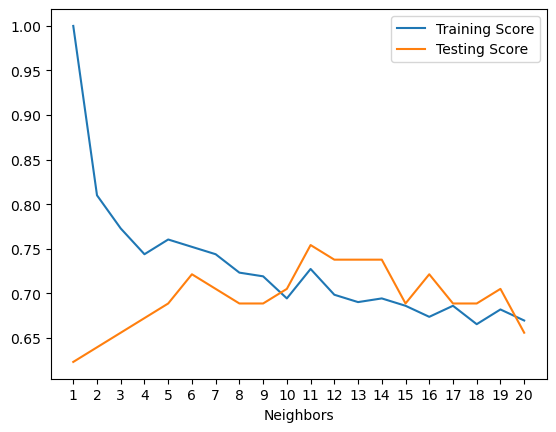

In [77]:
# Create a list of train scores
test_score=[]
# Create a list of test scores
train_score=[]
# Create a list of different values for n_neighbors
neighbors = range(1,21) # 1 to 20
# Setup algorithm
knn = KNeighborsClassifier()
# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    # fit the models
    knn.fit(X_train,y_train)
    # Update the training scores
    train_score.append(knn.score(X_train,y_train))
    # Update the testing scores
    test_score.append(knn.score(X_test,y_test))



plt.plot(neighbors,train_score,label='Training Score')
plt.plot(neighbors,test_score,label='Testing Score')
plt.xlabel('Neighbors')
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f'The maximum Test score is : {max(test_score)*100:.2f}%')

In [73]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [90]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Looking at the graph, `n_neighbors` = 11 seems best.

Even knowing this, the KNN's model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard `KNN` and focus on the other two.

We've tuned `KNN` by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using `RandomizedSearchCV`.

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

### Tuning models with with RandomizedSearchCV

Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune.

The same for [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

>Note: Be careful creating a hyperparameter dictionary for tuning as if there are typos in the keys of the dictionary, you will find that your code hyperparameter tuning code will produce errors.

In [101]:
# Create hyperparameter grid for LinearRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
# Create hyperparameter grid for  RandomForestClassifier
rf_grid={"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use `sklearn.model_selection.RandomizedSearchCV` to try and tune our LogisticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter=20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [97]:
# Tune LogisticRegression model.
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [98]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [99]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Nice! That seems on par with the result we got before without any hyperparameter tuning.

>Note: Many of the algorithms in Scikit-Learn have pretty good default hyperparameter values so don't be surprised if they perform pretty good on your data straight out of the box. But don't take this as being true all the time. Just because the default hyperparameters perform pretty well on your data doesn't mean there aren't a better set of hyperparameter values out there.

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [102]:
# Tune RandomForestClassifier model.
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [103]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [104]:
rs_rf.score(X_test,y_test)

0.8688524590163934

Excellent! Tuning the hyperparameters for each model saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression`.

But since `LogisticRegression` is pulling out in front, we'll try tuning it further with `GridSearchCV`.

### Tuning a model with GridSearchCV
The difference between RandomizedSearchCV and GridSearchCV is:

* [sklearn.model_selection.RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) searches over a grid of hyperparameters performing n_iter combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
* [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).
  
Each class will save the best model at the end of testing.

In [105]:
# # Different LogisticRegression hyperparameters
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [109]:
# Check the best parameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [108]:
# Evaluate the model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

>Note: If there are a large number of hyperparameter combinations in your grid, GridSearchCV may take a long time to try them all out. This is why it's a good idea to start with RandomizedSearchCV, try a certain amount of combinations and then use GridSearchCV to refine them.

## Evaluating a classification model, beyond accuracy
Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
| Metric/Evaluation Technique | Scikit-Learn Method/Documentation                                                                                      |
|-----------------------------|--------------------------------------------------------------------------------------------------------------------------|
| **ROC curve and AUC score** | [`sklearn.metrics.RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)— *Note: Previously `plot_roc_curve()`, changed in Scikit-Learn 1.2+*               |
| **Confusion matrix**        | [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)                                                                                     |
| **Classification report**   | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)                                                                                |
| **Precision**               | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)                                                                                      |
| **Recall**                  |[`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)                                                                                        |
| **F1-score**                | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)                                                                                              |

What many evaluation metrics have in common is that they compare model predictions to ground truth data.

So we'll need some model predictions!

To access them, we'll have to use our model to make predictions on the test set.

We can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

>Note: When making predictions with a trained model, the data you're trying to predict on must be in the same format your model was trained on. For example, if a model was trained with data formatted in a certain way, it's important to make future predictions on data formatted in that same way.

In [110]:
# Make function with tuned model
y_preds = gs_log_reg.predict(X_test)

In [111]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [112]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

They look like our original test data labels, except different where the model has predicred wrong.

Since we've got our prediction values we can find the metrics we want.

Let's start with the ROC curve and AUC scores.

### ROC Curve and AUC Scores
What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

>To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `RocCurveDisplay` (previously called plot_roc_curve in Scikit-Learn versions < 1.2) which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the `RocCurveDisplay` function we can see it has a class method called `from_estimator(estimator, X, y)` as inputs.

Where `estimator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.

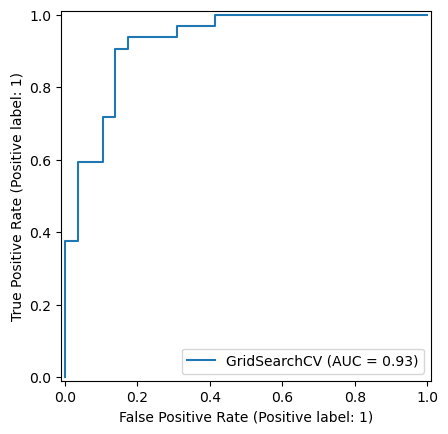

In [117]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test)

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5.

But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move on to the next evaluation request, a confusion matrix.

### Creating a confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

In [122]:
# Confusion metrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


As you can see, Scikit-Learn's built-in confusion matrix is a bit bland. For a presentation you'd probably want to make it visual.

Let's create a function which uses Seaborn's heatmap() for doing so.

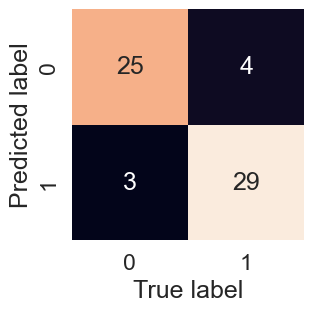

In [127]:
sns.set(font_scale = 1.5)  # Increase font size
def plot_conf_matrix(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    cbar=None,
                    annot=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_matrix(y_test, y_preds)

You can see the model gets confused (predicts the wrong label) relatively the same across both classes.

In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

As further evaluation, we could look into these samples and see why this may be the case.

### Classification report
A classification report is a collection of different metrics and other details.

We can make a classification report using [`sklearn.metrics.classification_report(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels.

A classification report will also give us information on the precision and recall of our model for each class.

In [129]:
print(classification_report(y_test,
    y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



| Metric/Metadata | Explanation |
|-----------------|-------------|
| **Precision**    | Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. |
| **Recall**       | Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. |
| **F1 score**     | A combination of precision and recall. A perfect model achieves an F1 score of 1.0. |
| **Support**      | The number of samples each metric was calculated on. |
| **Accuracy**     | The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0. |
| **Macro avg**    | Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t take class imbalance into account, so if you do have class imbalances, pay attention to this metric. |
| **Weighted avg** | Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class. |

Ok, now we've got a few deeper insights on our model.

But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use `cross_val_score()` along with various scoring parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels.

It then evaluates the machine learning model on the data and labels using cross-validation across `cv=5` (the default number of splits) splits and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [130]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [132]:
# Create as new classifier with best parameter
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")

In [138]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

The output from cross_val_score() shows 5 different metrics across different splits of the data.

This goes to show the power of cross-validation.

If we had have only chosen to go with the results of one data split, we might be thinking our model is under performing or over performing.

Since there are 5 metrics here, we'll take the average.

In [142]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8207936507936507)

In [144]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [145]:
# Cross-validated recall

cv_recall = cross_val_score(clf,
                        X,
                        y,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [147]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

Let's visualize them.

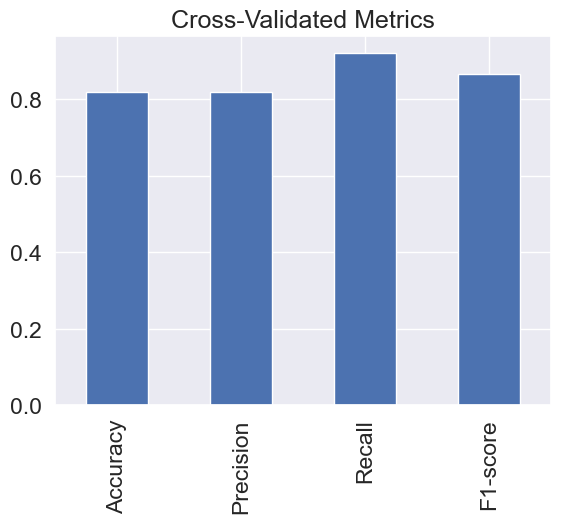

In [159]:
cv_metrics = pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "F1-score":cv_f1
},index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature importance

Feature importance is another way of asking, "Which features contribute most to the outcomes of the model?"

For our problem, trying to predict heart disease using a patient's medical characteristics, getting the feature importance is like asking "Which characteristics contribute most to a model predicting whether someone has heart disease or not?"

Because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well.

This means for each model, there's a slightly different way of finding which features were most important and in turn, the feature importance of one model won't necessarily reflect the feature importance of another.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "MODEL TYPE feature importance", such as, "random forest feature importance".

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the [`Scikit-Learn documentation for LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the coef_ attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`

In [160]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [161]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this `coef_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [162]:
# Match features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672769574500135),
 'sex': np.float64(-0.8604461876509621),
 'cp': np.float64(0.6606705956911073),
 'trestbps': np.float64(-0.011569931563712749),
 'chol': np.float64(-0.0016637424209784567),
 'fbs': np.float64(0.04386123481544026),
 'restecg': np.float64(0.3127581278171948),
 'thalach': np.float64(0.02459361107844528),
 'exang': np.float64(-0.6041306062020464),
 'oldpeak': np.float64(-0.5686283181245352),
 'slope': np.float64(0.4505162370054866),
 'ca': np.float64(-0.6360987949056705),
 'thal': np.float64(-0.6766338344951353)}

What it does:

* df.columns: gets the list of feature names (i.e., column names from your DataFrame).

* clf.coef_[0]: gets the learned weights (coefficients) from a trained linear model (like LogisticRegression) for class 0 vs 1.

* zip(...): pairs each feature name with its corresponding coefficient.

* dict(...): converts the zipped object into a dictionary.

Now we've match the feature coefficients to different features, let's visualize them.

<Axes: title={'center': 'Feature Importance'}>

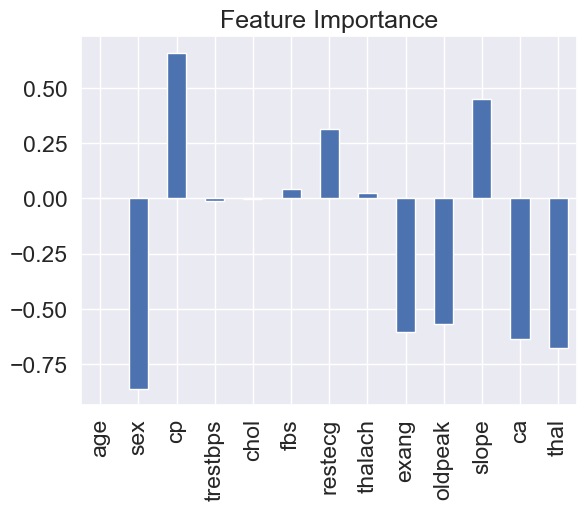

In [165]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False)

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.860, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [166]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [167]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Looking back the data dictionary, we see `slope` is the "slope of the peak exercise ST segment" where:

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

What can you do with this information?

This is something you might want to talk to a subject matter expert about.

They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

Doing this has a few benefits:

1. **Finding out more** - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
2. **Redirecting efforts** - If some features offer far more value than others, this may change how you collect data for different problems. See point 3
3. **Less but better** - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

In this case, we didn't.

The highest accuracy our model achieved was below 90%.

What next?
You might be wondering, what happens when the evaluation metric doesn't get hit?

In this case, we know the current model we're using (a tuned version of `sklearn.linear_model.LogisticRegression`) along with our specific data set doesn't hit the target we set ourselves.


A good next step would be to discuss with your team or research on your own different options of going forward.

* Could you collect more data? Across more patients with more features? This may take a while but in machine learning, more data is generally better.
* Could you try a better model? If you're working with structured data, you might want to look into [CatBoost](https://catboost.ai/) or [XGBoost](https://xgboost.ai/).
* Could you improve the current models (beyond what we've done so far)?
* If your model is good enough, how would you export it and share it with others? (Hint: check out [Scikit-Learn's documentation on model persistance](https://scikit-learn.org/stable/model_persistence.html))